In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import plotly.graph_objs as go
#import plotly.tools as tls
import os
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
dataset = pd.read_csv('E:/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
print('~> Do not have diabetes (Outcome = 0):\n   {}%'.format(100 - round(dataset['Outcome'].mean()*100, 2)))
print('\n~> Have diabetes(Outcome= 1):\n   {}%'.format(round(dataset['Outcome'].mean()*100, 2)))

~> Do not have diabetes (Outcome = 0):
   65.1%

~> Have diabetes(Outcome= 1):
   34.9%


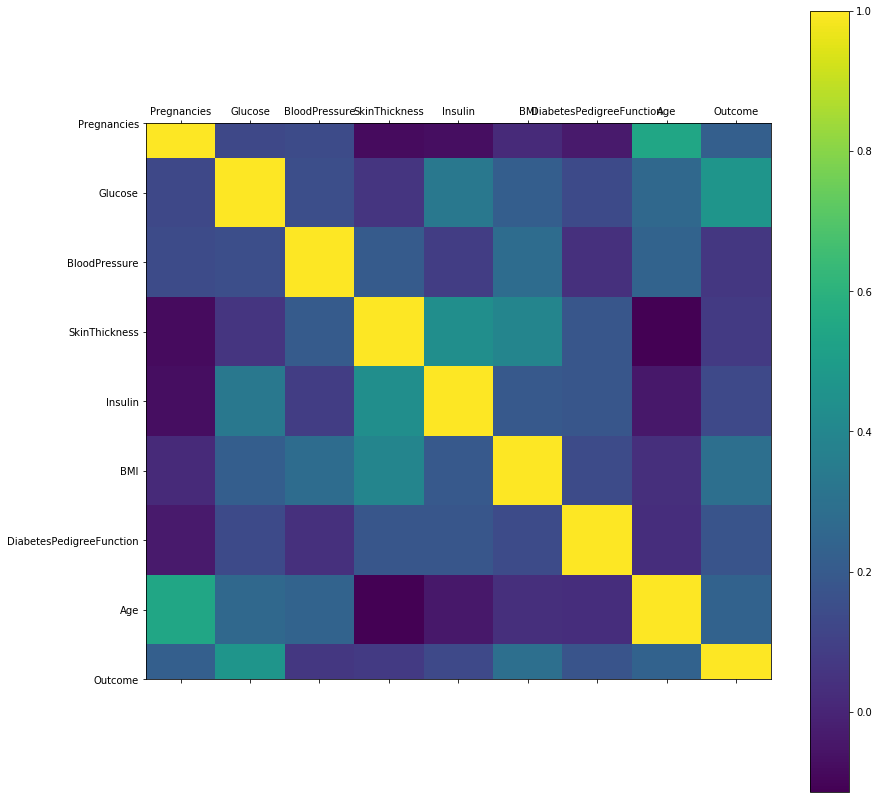

In [139]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

<Figure size 432x432 with 0 Axes>

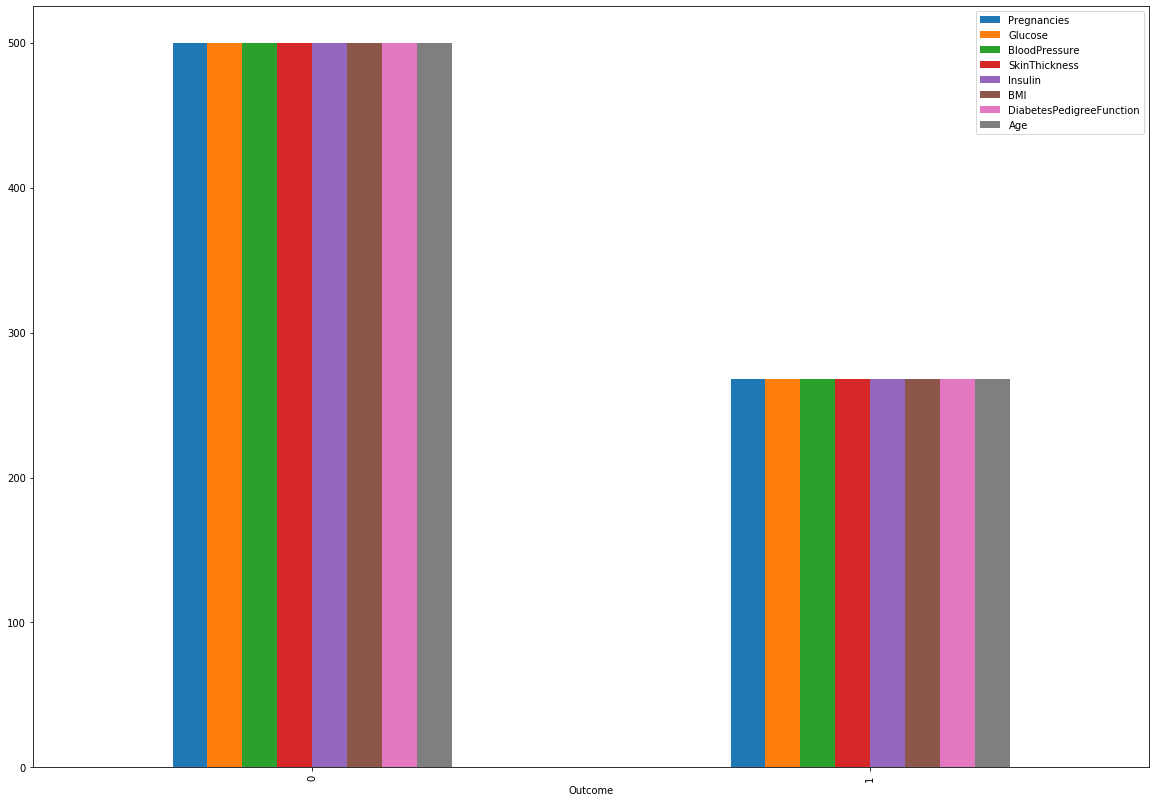

In [140]:
plt.figure(figsize=(6,6))
dataset.groupby("Outcome").count().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F35EF5AC8>,
      dtype=object)

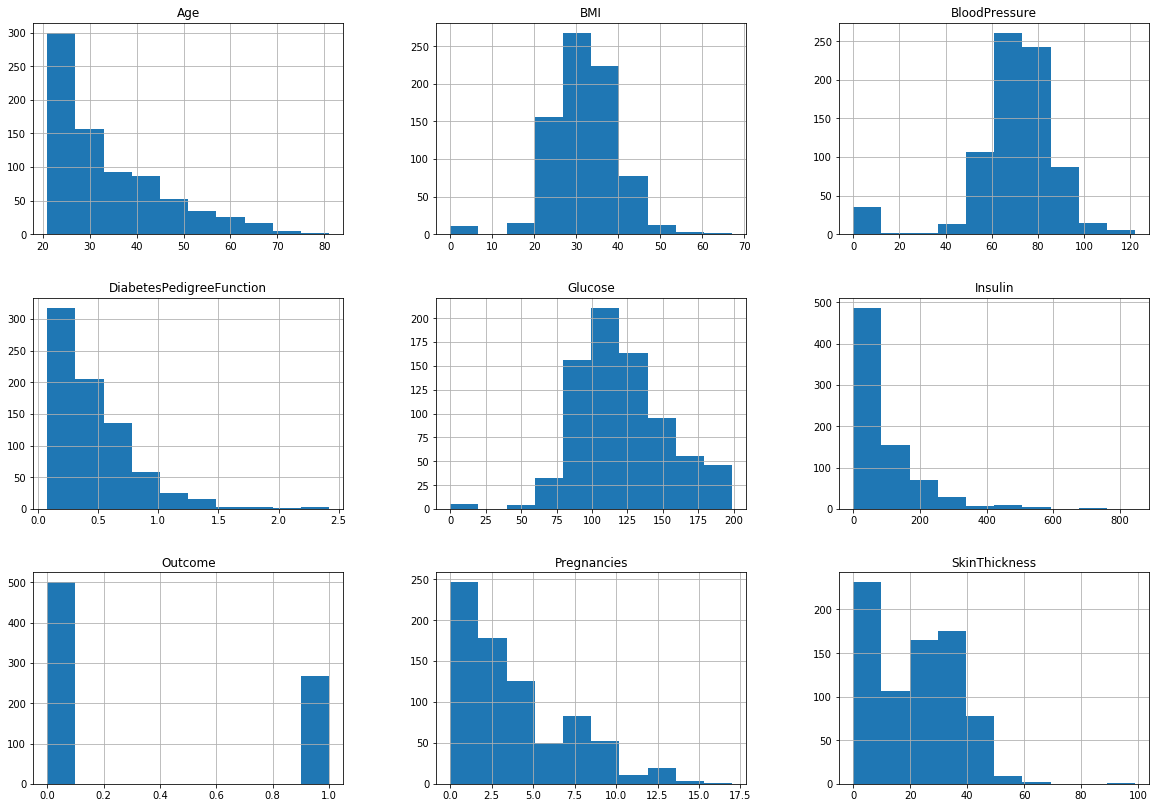

In [141]:
dataset.hist()

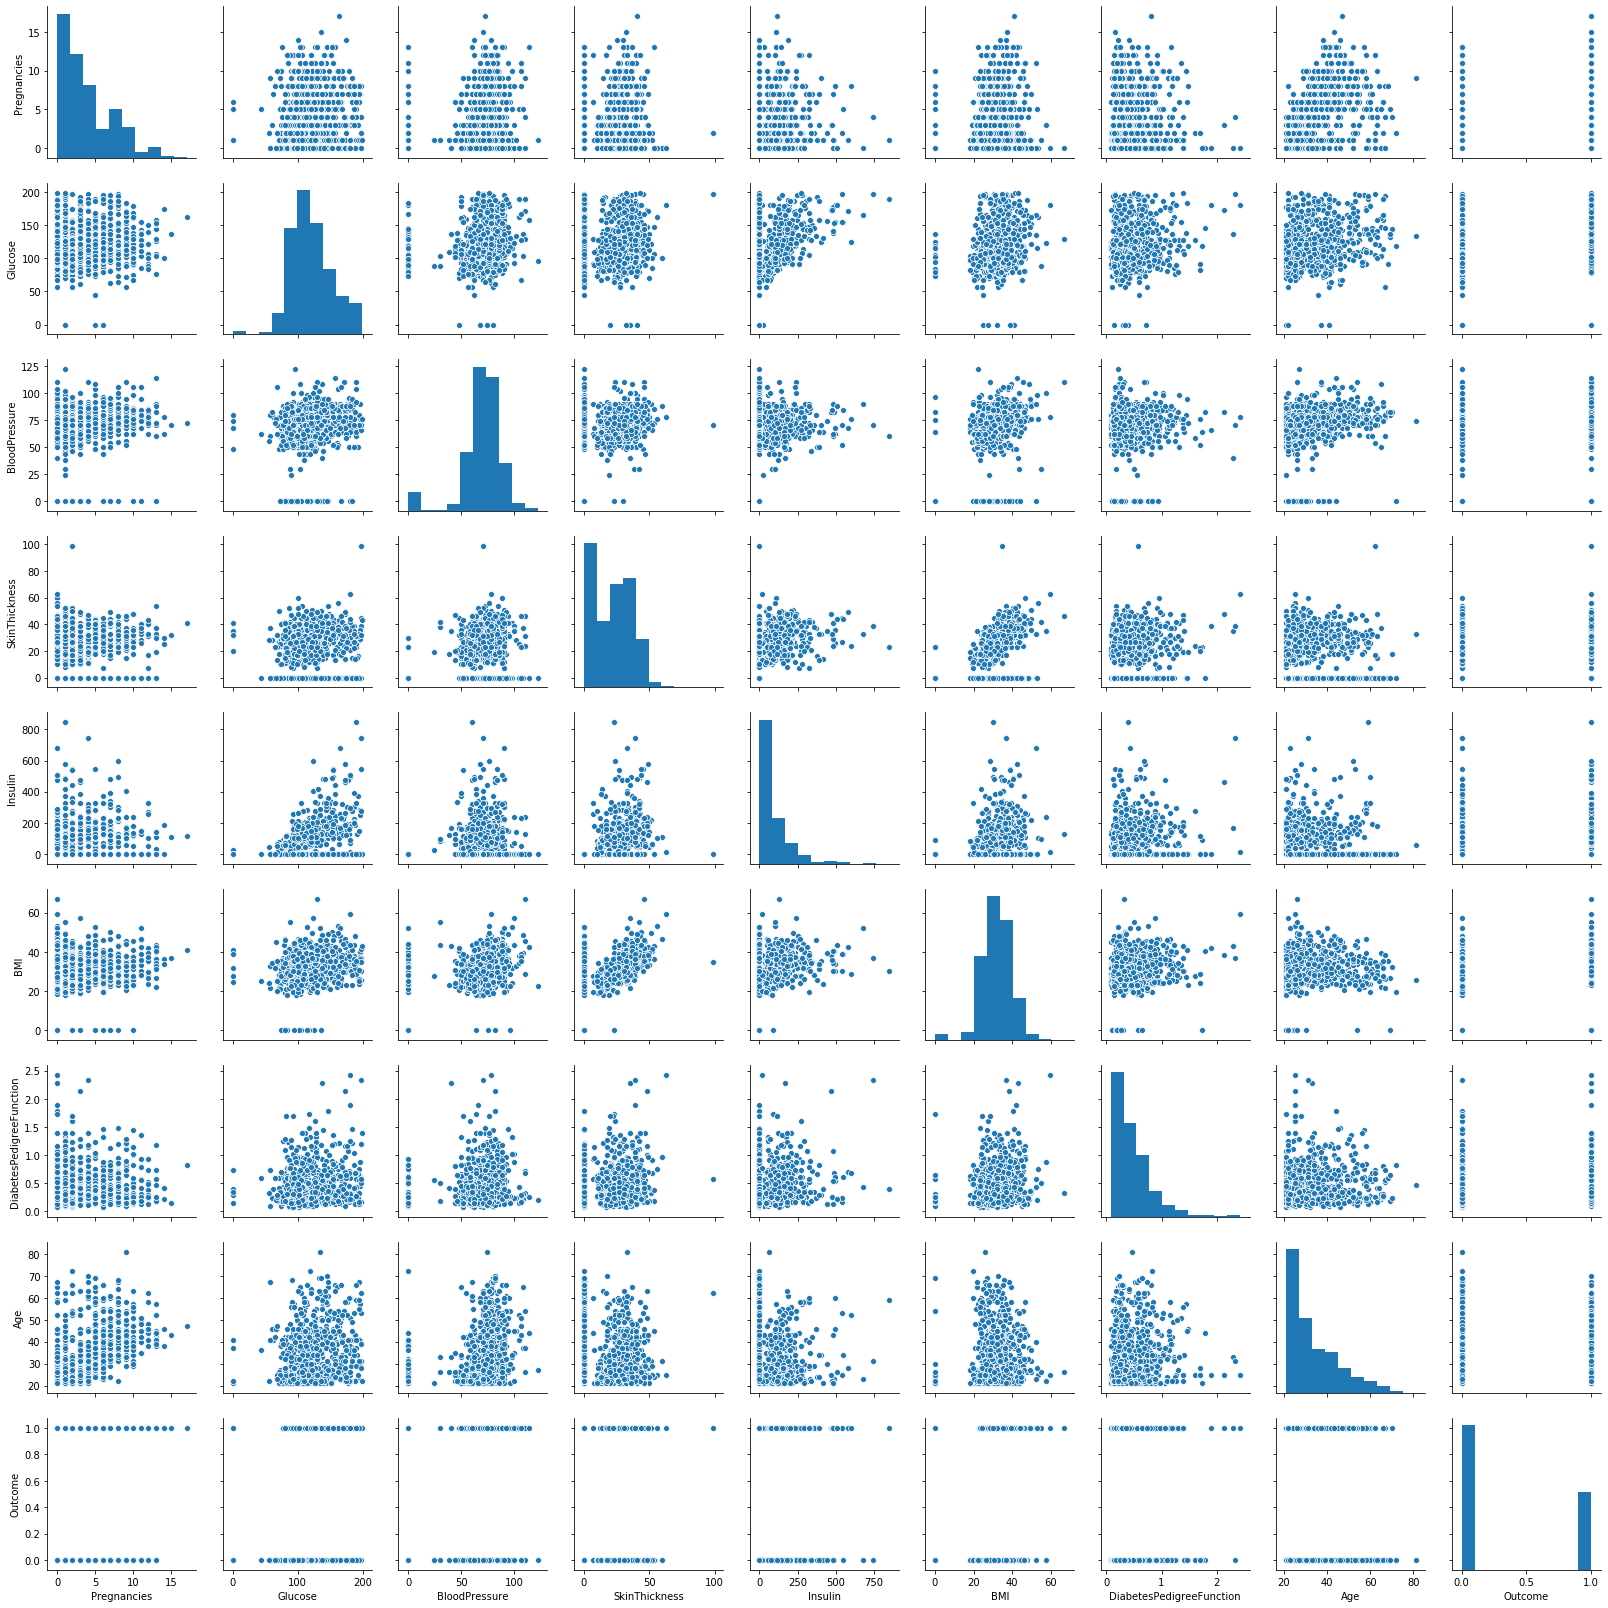

In [142]:
import seaborn as sns
sns.pairplot(dataset, palette='rainbow')

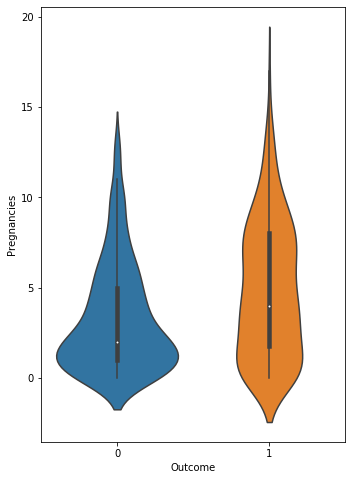

In [143]:
import seaborn as sns
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Outcome', y = 'Pregnancies', data = dataset[0:])
plt.show()

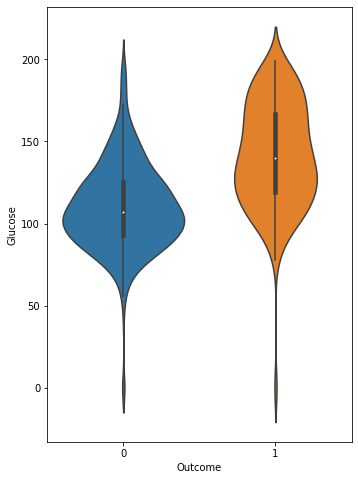

In [144]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Outcome', y = 'Glucose', data = dataset[0:])
plt.show()

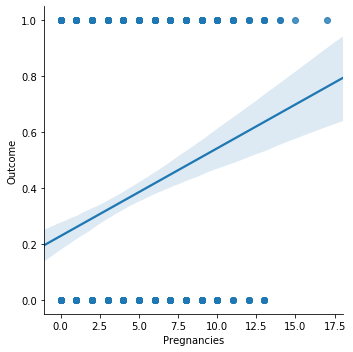

In [145]:
   sns.lmplot(x='Pregnancies',y='Outcome',data=dataset)

Number of Pregnancies: 17
1    135
0    111
2    103
3     75
4     68
5     57
6     50
7     45
8     38
9     28
Name: Pregnancies, dtype: int64


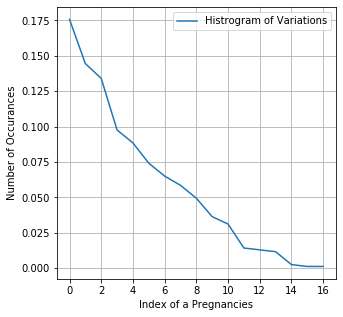

[0.17578125 0.3203125  0.45442708 0.55208333 0.640625   0.71484375
 0.77994792 0.83854167 0.88802083 0.92447917 0.95572917 0.97005208
 0.98307292 0.99479167 0.99739583 0.99869792 1.        ]


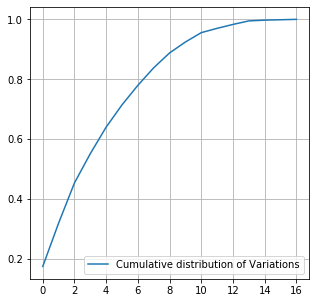

In [146]:
plt.figure(figsize=(5, 5))
unique_variations = dataset['Pregnancies'].value_counts()
print('Number of Pregnancies:', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Pregnancies')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()
c = np.cumsum(h)
print(c)
plt.figure(figsize=(5, 5))
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Count of each Outcome Class')

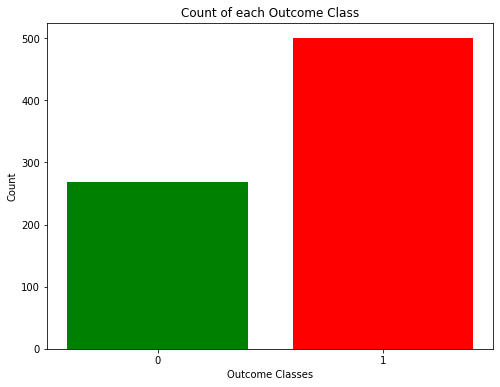

In [147]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Outcome'].unique(), dataset['Outcome'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Outcome Classes')
plt.ylabel('Count')
plt.title('Count of each Outcome Class')

In [3]:
y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [104]:
from sklearn.metrics import log_loss

# This function plots the confusion matrices given y_i, y_i_hat.

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):


#def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(8,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
  

In [133]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

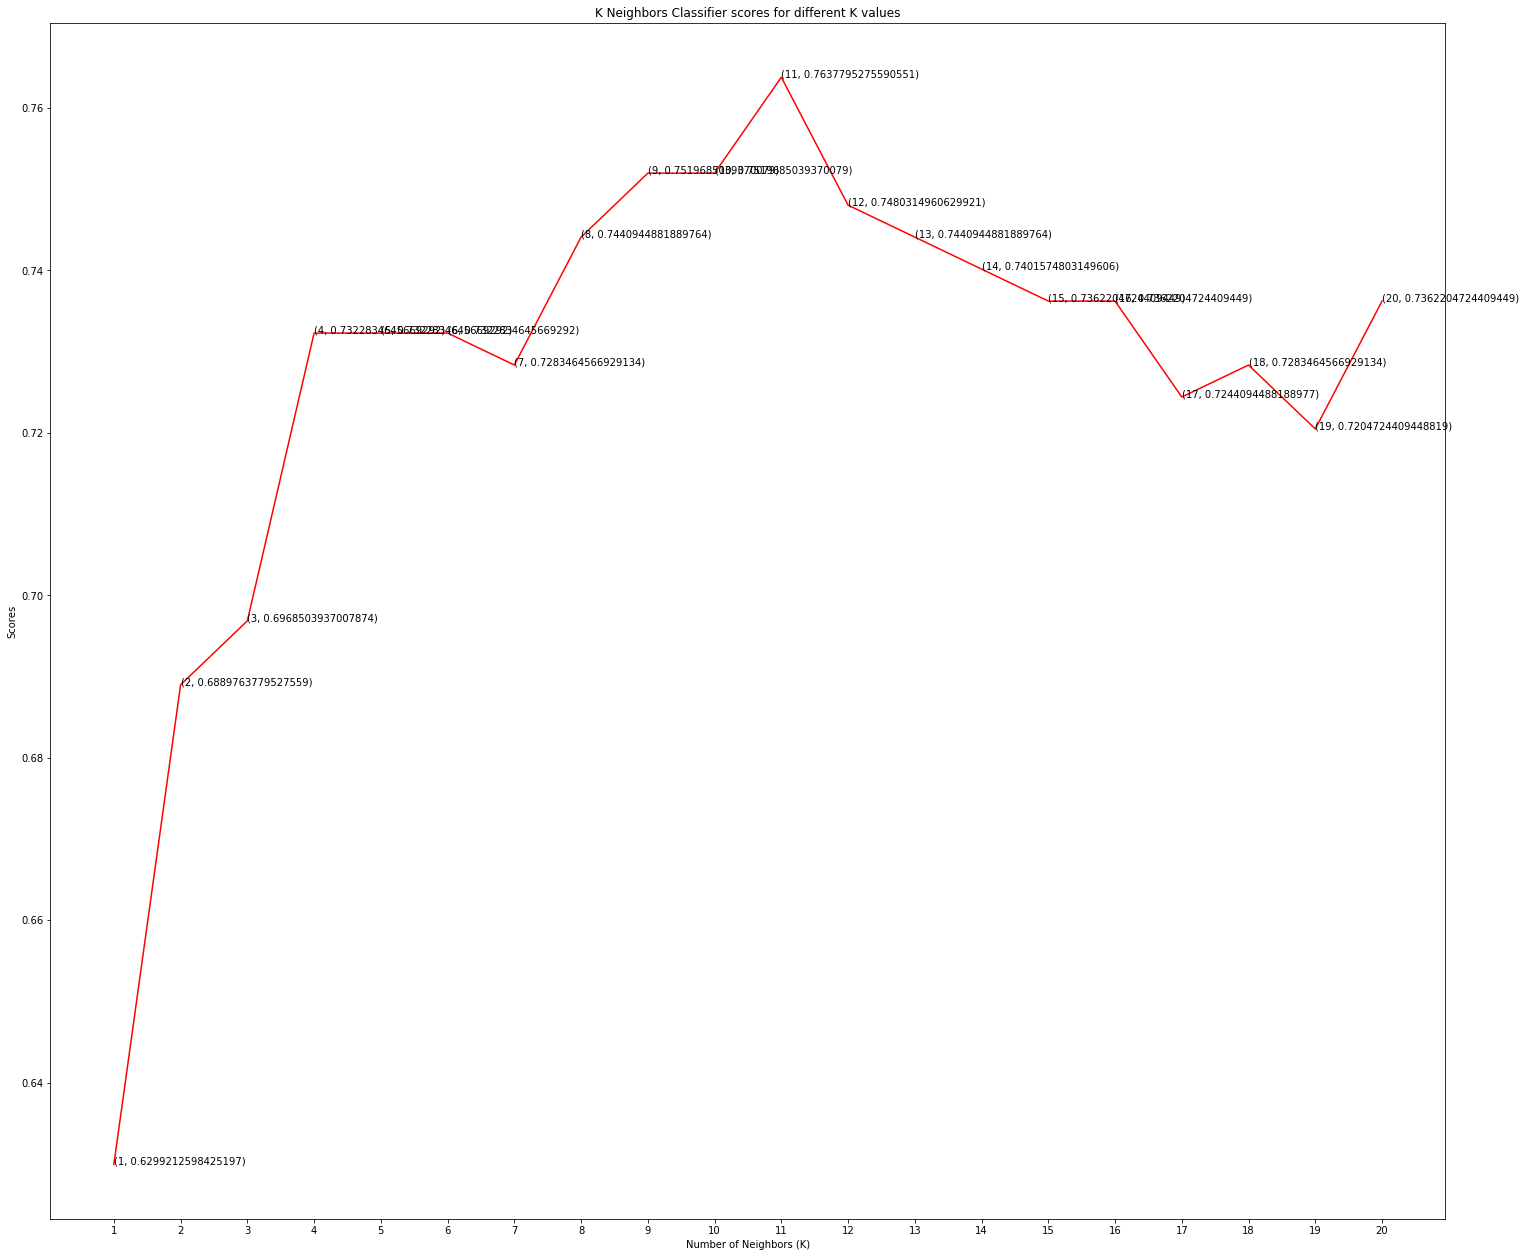

In [134]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
plt.figure(figsize=(25,22))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [105]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

The log loss is: 0.5621458340109242


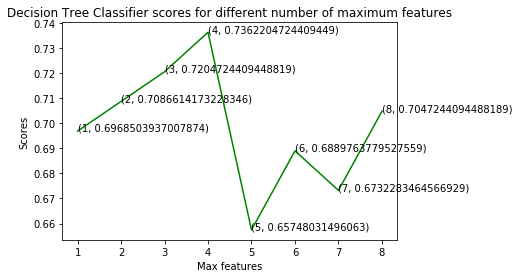

In [106]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV


plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')



clf=DecisionTreeClassifier(max_features = 8, random_state = 0)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



In [107]:
print( len(predict_y))
print( len(y_test))


254
254


In [108]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The log loss is: 0.4771200101768465


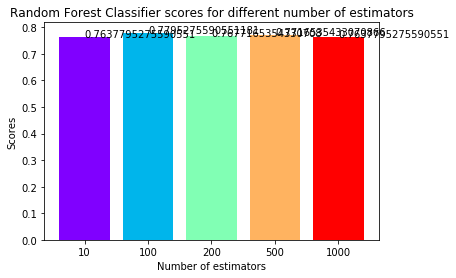

In [109]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
clf=RandomForestClassifier(n_estimators = 200, random_state = 0)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:

#########Plot confusion atrix
print(len(predict_y))
print(len(y_test))


# XGBOOST -ensemble technique


In [115]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

In [116]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68461	valid-logloss:0.68631
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61418	valid-logloss:0.63150
[20]	train-logloss:0.56014	valid-logloss:0.59340
[30]	train-logloss:0.51879	valid-logloss:0.56391
[40]	train-logloss:0.48608	valid-logloss:0.54286
[50]	train-logloss:0.45920	valid-logloss:0.52694
[60]	train-logloss:0.43703	valid-logloss:0.51684
[70]	train-logloss:0.41824	valid-logloss:0.50601
[80]	train-logloss:0.40209	valid-logloss:0.49747
[90]	train-logloss:0.38862	valid-logloss:0.49086
[100]	train-logloss:0.37706	valid-logloss:0.48775
[110]	train-logloss:0.36725	valid-logloss:0.48373
[120]	train-logloss:0.35889	valid-logloss:0.48054
[130]	train-logloss:0.35116	valid-logloss:0.47844
[140]	train-logloss:0.34380	valid-logloss:0.47817
[150]	train-logloss:0.33668	valid-logloss:0.47825
[160]	train-logloss:0.32945	valid-logloss:0.47870
Stopping. 

In [ ]:
print(len(predict_y))
print(len(y_test))
#plot_confusion_matrix(y_test, clf.predict(X_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

# ensemble method, Logistic Regression

In [121]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [122]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  1e-05 The log loss is: 0.6365158280086524
For values of alpha =  0.0001 The log loss is: 0.6365158280086524
For values of alpha =  0.001 The log loss is: 0.6040024157037428
For values of alpha =  0.01 The log loss is: 0.5954477281268342
For values of alpha =  0.1 The log loss is: 0.6063720367149824
For values of alpha =  1 The log loss is: 0.5832290080511672
For values of alpha =  10 The log loss is: 0.6067052300559034


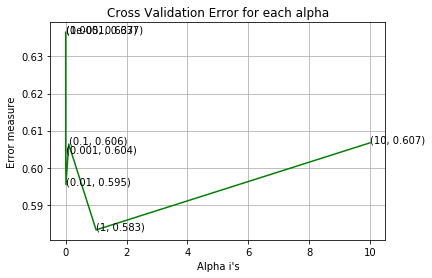

In [123]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [124]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=42,
                                                    shuffle=True, tol=0.001,
                                               

In [126]:
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#plot_confusion_matrix(y_test, predicted_y)

For values of best alpha =  1 The train log loss is: 0.6042174982990802
For values of best alpha =  1 The test log loss is: 0.5832290080511672
Total number of data points : 254


# Feature Importance


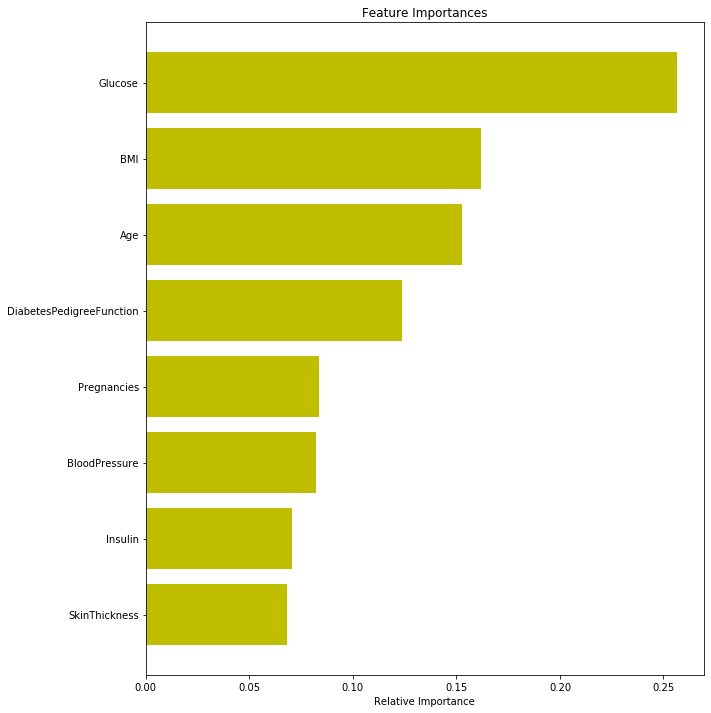

In [132]:
clf=RandomForestClassifier(n_estimators = 500, random_state = 0)
clf.fit(X_train,y_train)
features = X_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparing Models

[0.3828 0.4158 0.3972 0.5409 0.3803 0.4135]
lowest logg loss :  0.3803
SVM


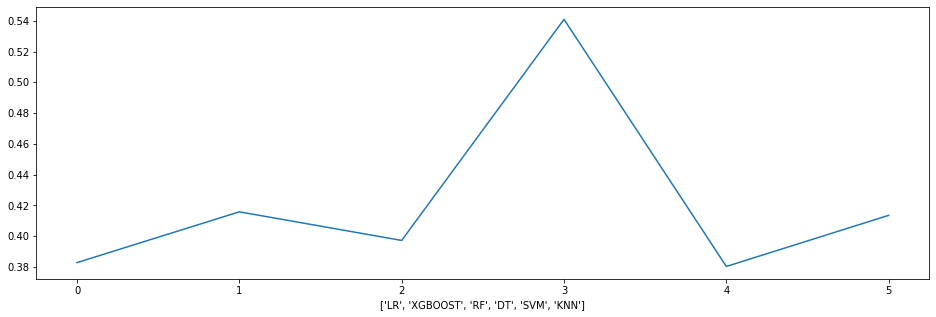

In [128]:
error_rate=np.array([0.3828,0.4158,0.3972,0.5409,0.3803,0.4135])
plt.figure(figsize=(16,5))
print(error_rate)
#plt.scatter(error_rate,range(1,7))
#seed = 7
# prepare models
models = ['LR','XGBOOST','RF','DT','SVM','KNN']
plt.xlabel(models)
plt.plot(error_rate)
lowest_loss=np.argmin(error_rate)
print("lowest logg loss : ",min(error_rate))
print(models[lowest_loss])